# HeartRate Analyzer

- Heartbeat Sounds Source: https://www.kaggle.com/kinguistics/heartbeat-sounds/data?select=set_a_timing.csv
- Script takes in .wav files, calculates the number of heartbeats in the audio file
- Note - this analyzer has a tendency to overshoot the heartrate
- To Do: Play around with distance/threshold for optimum results

In [38]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import find_peaks
import numpy as np
from playsound import playsound

# Read the Audio File
path = "set_a\\murmur__201108222255.wav"
sample_rate, samples = wavfile.read(path)

#Play the sound
playsound(path)

# Get the duration of the audio file
time = len(samples)/sample_rate

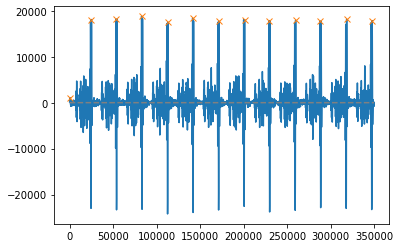

In [39]:
# Find peaks of the sample (heartbeats) and their respective properties
peaks, properties = find_peaks(samples, height=0, distance = sample_rate/2)

#Plot the results
plt.plot(samples)
plt.plot(peaks, samples[peaks], "x") #x marks the peaks
plt.plot(np.zeros_like(samples), "--", color="gray")
plt.show()

In [40]:
#Calculating BPM
bpm = len(peaks)*60/time
bpm

98.29179501540185